In [1]:
import pandas as pd
import numpy as np

In [2]:
from missing_columns_pd  import miss_cols

In [147]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)


In [4]:
cdtype ={'Zip_Code':str}

In [5]:
census_combined4 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\census_combined4.csv',dtype={'Zip_Code':str},index_col=0)

In [6]:
hy_vee_liquor_or_spirit_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\hy_vee_liquor_or_spirit_df.csv',dtype={'Zip_Code':str},index_col=0)

In [ ]:
list(hy_vee_liquor_or_spirit_df.columns)

In [ ]:
hy_vee_liquor_or_spirit_df.columns = ['Zip_Code', 'hy_vee_num_stores', 'liquor_or_spirit_num_stores']

In [ ]:
# store counts contains counts by zip code of each of the four store types determined by the K-means clustering of the stores

In [7]:
store_counts_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_counts_df.csv',dtype={'Zip_Code':str},index_col=0)

In [10]:
census_combined4_copy = census_combined4.copy()

In [11]:
census_combined4_copy.shape

(934, 80)

 merge stores counts from kmeans clustering to just get zip code and inpute with zero

In [13]:
# merge stores counts from kmeans clustering to just get zip code
store_counts_df2 = census_combined4[['Zip_Code']].merge(store_counts_df, how='left').fillna(0)

In [149]:
np.sum(store_counts_df2.isna())

Zip_Code       0
outlier        0
Convenience    0
Large          0
Medium         0
Smaller        0
dtype: int64

In [16]:
store_counts_df2.shape

(934, 6)

merge liquor or hy-vee or spirit count

In [145]:
#merge liquor or hy-vee or spirit counts
census_combined4 = census_combined4.merge(hy_vee_liquor_or_spirit_df, how='left')


In [146]:
census_combined4.shape

(934, 111)

merge store_counts_df2 with Census data to pick up store count columns

In [20]:
# census_combined4.merge(store_counts_df, how='left').head()
census_combined4 =census_combined4.merge(store_counts_df2, how='left') 

In [21]:
census_combined4.head()

,Zip_Code,pct_Married-couple_household,pct_High_school_graduate_or_higher,pct_Bachelors_degree_or_higher,Total_population,Male,Female,Sex_ratio_(males_per_100_females),Under_5_years,5_to_9_years,10_to_14_years,15_to_19_years,20_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_59_years,60_to_64_years,65_to_74_years,75_to_84_years,85_years_and_over,Median_age_(years),Under_18_years,16_years_and_over,18_years_and_over,21_years_and_over,62_years_and_over,65_years_and_over,Total_population_2015,Median_age_2015,18_years_and_over_2015,21_years_and_over_2015,OCCUPATION,Civilian_employed_population_16_years_and_over,"Management,_business,_science,_and_arts_occupations",Service_occupations,Sales_and_office_occupations,"Natural_resources,_construction,_and_maintenance_occupations","Production,_transportation,_and_material_moving_occupations",INCOME_AND_BENEFITS_(IN_2020_INFLATION-ADJUSTED_DOLLARS),Total_households,"Less_than_$10,000","$10,000_to_$14,999","$15,000_to_$24,999","$25,000_to_$34,999","$35,000_to_$49,999","$50,000_to_$74,999","$75,000_to_$99,999","$100,000_to_$149,999","$150,000_to_$199,999","$200,000_or_more",Median_household_income_(dollars),HOUSING_TENURE,Occupied_housing_units,Owner-occupied,Renter-occupied,Average_household_size_of_owner-occupied_unit,Average_household_size_of_renter-occupied_unit,VALUE,Owner-occupied_units,"Less_than_$50,000","$50,000_to_$99,999","$100,000_to_$149,999.1","$150,000_to_$199,999.1","$200,000_to_$299,999","$300,000_to_$499,999","$500,000_to_$999,999","$1,000,000_or_more",Median_Home_Market_Value,ALAND20,land_area_sq_kilometers,land_area_sq_miles,number_of_stores,population_growth,population_per_store_None,primary_city,state,county,pct_mgmnt_sc_bs_art,population_density,hy_vee_num_stores,liquor_or_spirit_num_stores,outlier,Convenience,Large,Medium,Smaller
0,50001,68.8,94.2,31.8,749.0,331.0,418.0,79.2,85.0,48.0,55.0,57.0,39.0,43.0,120.0,77.0,66.0,68.0,57.0,34.0,0.0,39.3,227.0,544.0,522.0,500.0,145.0,91.0,734.0,33.8,495.0,480.0,OCCUPATION,357.0,207.0,24.0,64.0,20.0,42.0,INCOME,266.0,0.0,29.0,3.0,5.0,30.0,44.0,37.0,75.0,21.0,22.0,"89,773.0",HOUSING_TENURE,266.0,233.0,33.0,2.73,3.42,VALUE,233.0,5.0,23.0,35.0,32.0,49.0,73.0,16.0,0.0,"252,600.0",61103508,61.103508,23.59219633331561,0.0,1.0204359673024523,NaN,Ackworth,IA,Warren County,57.98319327731093,31.747785980498275,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,50002,64.4,99.3,18.0,"1,359.0",687.0,672.0,102.2,101.0,101.0,61.0,50.0,43.0,172.0,119.0,210.0,139.0,124.0,117.0,93.0,29.0,47.7,288.0,"1,087.0","1,071.0","1,046.0",295.0,239.0,"1,442.0",42.0,"1,094.0","1,070.0",OCCUPATION,724.0,245.0,77.0,196.0,83.0,123.0,INCOME,595.0,31.0,3.0,39.0,82.0,110.0,78.0,72.0,113.0,18.0,49.0,"64,531.0",HOUSING_TENURE,595.0,438.0,157.0,2.38,1.96,VALUE,438.0,36.0,78.0,131.0,71.0,46.0,9.0,62.0,5.0,"124,800.0",286400425,286.400425,110.57982229997388,2.0,0.9424410540915396,679.5,Adair,IA,Adair County,33.83977900552486,12.289764730435104,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,50003,60.7,95.0,44.9,"7,872.0","3,929.0","3,943.0",99.6,473.0,661.0,608.0,371.0,385.0,608.0,"1,596.0",997.0,440.0,580.0,663.0,376.0,114.0,39.6,"1,992.0","6,027.0","5,880.0","5,624.0","1,482.0","1,153.0","7,109.0",42.5,"5,242.0","5,115.0",OCCUPATION,"4,232.0","2,073.0",553.0,951.0,429.0,226.0,INCOME,"3,075.0",125.0,72.0,187.0,146.0,269.0,513.0,406.0,691.0,258.0,408.0,"88,875.0",HOUSING_TENURE,"3,075.0","2,429.0",646.0,2.66,1.9,VALUE,"2,429.0",113.0,134.0,248.0,265.0,502.0,730.0,382.0,55.0,"292,500.0",297841727,297.841727,114.99733369870988,5.0,1.1073287382191588,"1,574.4",Adel,IA,Dallas County,48.98393194706994,68.45376102914214,0.0,1.0,0.0,3.0,1.0,1.0,0.0
3,50005,64.5,93.5,11.6,"1,060.0",462.0,598.0,77.3,44.0,98.0,39.0,66.0,18.0,54.0,238.0,149.0,37.0,41.0,55.0,76.0,145.0,42.9,212.0,864.0,848.0,806.0,299.0,276.0,861.0,44.9,641.0,618.0,OCCUPATION,474.0,59.0,210.0,72.0,22.0,111.0,INCOME,380.0,1.0,0.0,26.0,98.0,49.0,92.0,73.0,39.0,2.0,0.0,"56,250.0",HOUSING_TENURE,380.0,307.0,73.0,2.93,2.18,VALUE,307.0,36.0,122

In [22]:
census_combined4['liquor_or_spirit_num_stores'] = census_combined4.liquor_or_spirit_num_stores.fillna(0)
# census_combined4.liquor_or_spirit_num_stores.fillna(0)

In [23]:
census_combined4.liquor_or_spirit_num_stores.head()

0   0.0
1   0.0
2   1.0
3   0.0
4   1.0
Name: liquor_or_spirit_num_stores, dtype: float64

In [24]:
census_combined4['hy_vee_num_stores'] = census_combined4.hy_vee_num_stores.fillna(0)

In [25]:
census_combined4.hy_vee_num_stores.head()

0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
Name: hy_vee_num_stores, dtype: float64

In [26]:
miss_cols(census_combined4)

[('population_per_store_None', 464, 0.4968),
 ('pct_mgmnt_sc_bs_art', 3, 0.0032),
 ('population_growth', 1, 0.0011)]

In [28]:
census_combined4['liquor_or_spirit_or_hy_vee'] = (census_combined4.hy_vee_num_stores > 0) | (census_combined4.liquor_or_spirit_num_stores > 0)

In [29]:
census_combined4[['Zip_Code','liquor_or_spirit_or_hy_vee','hy_vee_num_stores','liquor_or_spirit_num_stores']].head()

,Zip_Code,liquor_or_spirit_or_hy_vee,hy_vee_num_stores,liquor_or_spirit_num_stores
0,50001,False,0.0,0.0
1,50002,False,0.0,0.0
2,50003,True,0.0,1.0
3,50005,False,0.0,0.0
4,50006,True,0.0,1.0


In [151]:

census_combined4['population_per_store_None'].describe().round()

count      470.0
mean     1,448.0
std        933.0
min         20.0
25%        893.0
50%      1,266.0
75%      1,735.0
max     12,832.0
Name: population_per_store_None, dtype: float64

In [38]:
# Owner-occupied/Occupied_housing_units
# Renter-occupied/Occupied_housing_units  
census_combined4['pct_owner_occup_hous'] = census_combined4['Owner-occupied']/census_combined4['Occupied_housing_units']
census_combined4['pct_rent_occup_hous'] = census_combined4['Renter-occupied']/census_combined4['Occupied_housing_units']

In [39]:


census_combined4['pop_25_to_44']  = census_combined4['25_to_34_years'] + census_combined4['35_to_44_years']

census_combined4['pop_25_to_54'] = census_combined4['25_to_34_years'] + census_combined4['35_to_44_years'] + census_combined4['45_to_54_years']

# census_combined4['pop_25_to_44'].describe()

In [40]:
census_combined4['pop_25_to_44'].sum() # 778,218

778218.0

In [41]:
census_combined4['pct_25_to_44'] = round(census_combined4['pop_25_to_44']/census_combined4['Total_population']*100,2)

In [42]:
census_combined4['pct_25_to_44'].describe().round(2)

count   932.0
mean    21.83
std      6.02
min       0.0
25%     18.48
50%     22.01
75%     25.08
max     52.27
Name: pct_25_to_44, dtype: float64

In [43]:
# 21_years_and_over/Total_population

census_combined4['pct_21_years_and_over'] = round(100 * census_combined4['21_years_and_over']/census_combined4['Total_population'],2)

In [44]:
census_combined4['pct_21_years_and_over'].describe().round(2)

count   932.0
mean     74.2
std      7.64
min       5.5
25%     70.37
50%     74.07
75%     77.83
max     100.0
Name: pct_21_years_and_over, dtype: float64

In [168]:
census_combined4['pop_25_to_54'].describe()

count                 934.0
mean     1,232.389721627409
std     2,609.8509622519746
min                     0.0
25%                  144.25
50%                   336.5
75%                   865.0
max                18,350.0
Name: pop_25_to_54, dtype: float64

In [46]:
census_combined4.pop_25_to_54.sum() # 1,151,052

1151052.0

In [47]:
census_combined4['pct_25_to_54_years'] = round(census_combined4['pop_25_to_54']/census_combined4['Total_population']*100,2)

In [169]:
# census_combined4['pct_25_to_54_years'].head()

In [49]:
# 25_to_34_years, Total_population 
census_combined4['pct_25_to_34_years'] = round(census_combined4['25_to_34_years']/census_combined4['Total_population']*100,2)

In [170]:
# census_combined4['pct_25_to_34_years'].head()

In [51]:
census_combined4['Median_household_income_(dollars)'].describe().round()

count       934.0
mean     60,836.0
std      18,857.0
min           0.0
25%      51,447.0
50%      59,750.0
75%      69,393.0
max     162,059.0
Name: Median_household_income_(dollars), dtype: float64

In [152]:
census_combined4['population_density'] = census_combined4['population_density'].round()

<AxesSubplot:xlabel='population_density', ylabel='Count'>

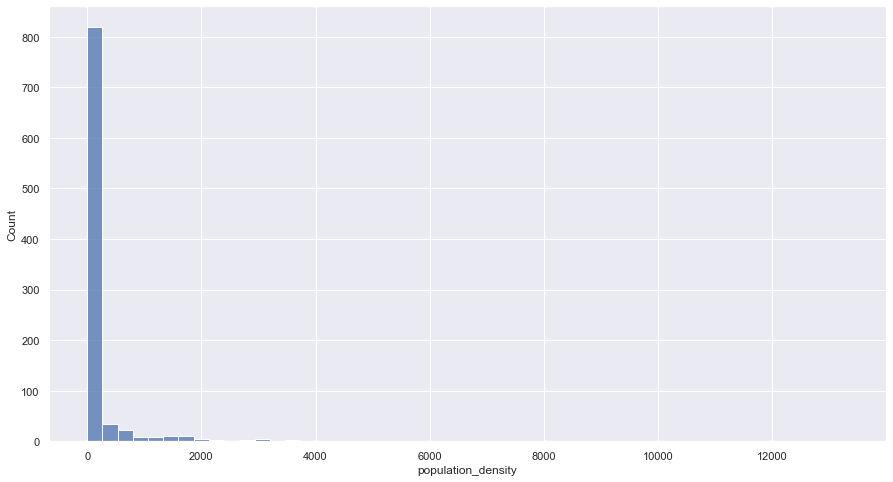

In [54]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(census_combined4[['population_density']]['population_density'], bins=50)

<AxesSubplot:xlabel='pct_21_years_and_over', ylabel='Count'>

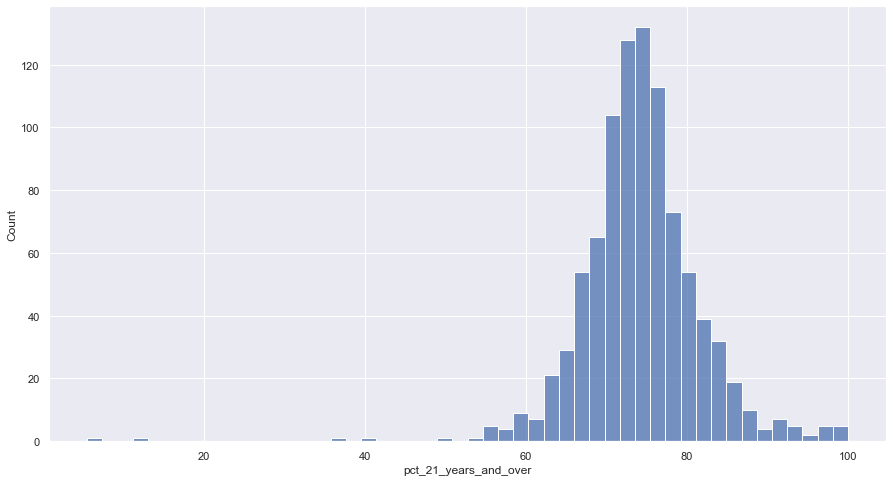

In [55]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(census_combined4[['pct_21_years_and_over']]['pct_21_years_and_over'], bins=50)

<AxesSubplot:xlabel='Total_population', ylabel='Count'>

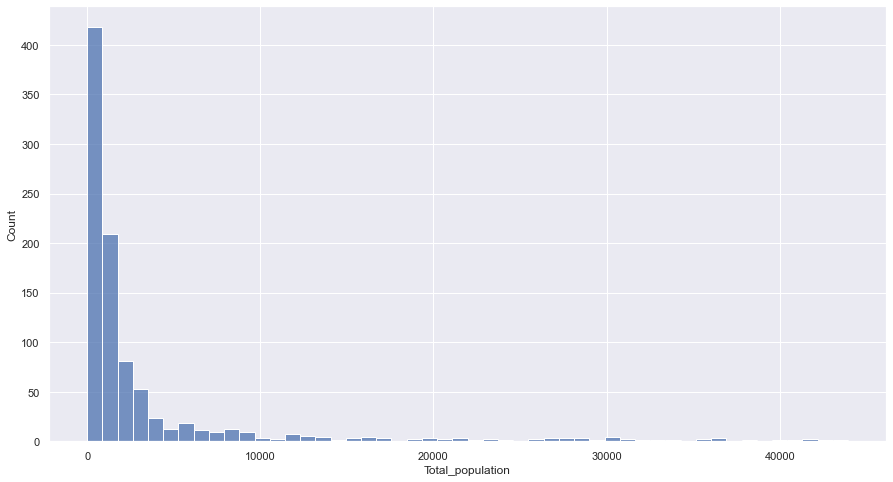

In [56]:

# Total_population
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(census_combined4[['Total_population']]['Total_population'], bins=50)

In [57]:
census_combined4['population_per_store_None'] = census_combined4['population_per_store_None'].round()

In [58]:
# number_of_stores
census_combined4['no_stores'] = census_combined4['number_of_stores'] == 0

In [59]:
census_combined4['no_stores'].value_counts()

False    470
True     464
Name: no_stores, dtype: int64

In [60]:
# list(census_combined4.columns)

In [61]:
census_combined4['land_area_sq_miles'] = round(census_combined4['land_area_sq_miles'])

In [62]:
# census_combined4.loc[(census_combined4['number_of_stores'] == 0) & (census_combined4['pct_Bachelors_degree_or_higher'] > 30),['population_per_store_None','Total_population','population_density','Median_age_(years)','land_area_sq_miles']].sort_values(by='population_per_store_None',ascending=False)

In [63]:
# (163, 9)
print('zips_med_income_gt_75K = ',census_combined4.loc[census_combined4['Median_household_income_(dollars)'] > 75000,['Zip_Code','Median_household_income_(dollars)','population_density', 'population_per_store_None','pct_25_to_54_years', 'pct_25_to_44','Median_age_(years)','primary_city','county']].shape[0])

zips_med_income_gt_75K =  163


In [64]:
census_combined4.loc[census_combined4['Median_household_income_(dollars)'] > 75000,['Zip_Code','Median_household_income_(dollars)','population_density', 'population_per_store_None','pct_25_to_54_years', 'pct_25_to_44','Median_age_(years)','primary_city','county']].shape

(163, 9)

In [67]:
census_combined4['land_area_sq_miles'].describe().round()

count   934.0
mean     60.0
std      47.0
min       0.0
25%      28.0
50%      49.0
75%      83.0
max     338.0
Name: land_area_sq_miles, dtype: float64

In [68]:
census_combined4.population_per_store_None.describe().round()

count      470.0
mean     1,448.0
std        933.0
min         20.0
25%        893.0
50%      1,266.0
75%      1,735.0
max     12,832.0
Name: population_per_store_None, dtype: float64

In [69]:
census_combined4.pct_Bachelors_degree_or_higher.describe().round()

count   934.0
mean     21.0
std      11.0
min       0.0
25%      14.0
50%      19.0
75%      25.0
max      78.0
Name: pct_Bachelors_degree_or_higher, dtype: float64

In [70]:
print('The number of zips with pct Bach degree plus_gt_30 = ',np.sum(census_combined4['pct_Bachelors_degree_or_higher'] > 30))

# 
# census_combined4['Bach_degree_plus_gt_30_pct'] = census_combined4['pct_Bachelors_degree_or_higher'] > 30

The number of zips with pct Bach degree plus_gt_30 =  119


In [75]:
census_combined4['pop_25_to_54_yr_to_stores'] = census_combined4['pop_25_to_54'].div(census_combined4['number_of_stores']).replace(np.inf,None)

In [171]:
# census_combined4['pop_25_to_54_yr_to_stores'].head() 

In [77]:
census_combined4.population_density.describe().round()

count      934.0
mean       195.0
std        699.0
min          0.0
25%         13.0
50%         21.0
75%         51.0
max     13,327.0
Name: population_density, dtype: float64

In [80]:
census_combined4['pct_change_population'] = round(100 *  (census_combined4.Total_population - census_combined4.Total_population_2015)/census_combined4.Total_population_2015,2)

In [81]:
census_combined4['pct_change_population'].head()

0    2.04
1   -5.76
2   10.73
3   23.11
4    2.57
Name: pct_change_population, dtype: float64

In [82]:
# iowa_pct_change_population = round(100 *  (3,150,011 - 3,093,526)/3,093,526
iowa_pct_change_population = round(100 *  (3150011 - 3093526)/3093526,2)
iowa_pct_change_population

1.83

In [154]:
census_combined4['pct_change_population_index'] = round(census_combined4['pct_change_population']/iowa_pct_change_population *100,2)

In [84]:
# 29.3%
iowa_pct_Bachelors_degree_or_higher = 29.3

census_combined4['bachelor_degree_index'] = round(census_combined4['pct_Bachelors_degree_or_higher']/iowa_pct_Bachelors_degree_or_higher *100,2)
census_combined4['bachelor_degree_index'].head(2)

0   108.53
1    61.43
Name: bachelor_degree_index, dtype: float64

In [85]:
# iowa_median_hh_income = 	61,836
iowa_median_hh_income = 61836
# median_hh_income
census_combined4['median_hh_income_index'] = round(census_combined4['Median_household_income_(dollars)']/iowa_median_hh_income *100,2)
census_combined4['median_hh_income_index'].head()

0   145.18
1   104.36
2   143.73
3    90.97
4    91.42
Name: median_hh_income_index, dtype: float64

In [86]:
# iowa land_area_sq_miles = 55,857.13
iowa_pop_density = 54.5

In [87]:
census_combined4['pop_density_index'] = round(census_combined4['population_density']/iowa_pop_density *100,2)
census_combined4['pop_density_index'].head()

0    58.72
1    22.02
2   124.77
3    71.56
4    23.85
Name: pop_density_index, dtype: float64

In [89]:
# sort_by_pop_per_store_df = census_combined4.loc[census_combined4.pct_Bachelors_degree_or_higher > 30, ['Zip_Code','population_per_store_None','Total_population','pct_change_population','population_density','land_area_sq_miles','Median_age_(years)','pct_25_to_44','Median_household_income_(dollars)', 'number_of_stores','hy_vee_num_stores',
#                                                                              'liquor_or_spirit_num_stores','primary_city','county']].sort_values(by='population_per_store_None', ascending=False)

In [90]:
# sort_by_pop_per_store_df.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\sort_by_pop_per_store_df.csv')

In [91]:
# sort_by_pop_per_store_df

In [92]:
# Urbandale
census_combined4.loc[census_combined4.primary_city == 'Urbandale', ['Zip_Code','population_per_store_None','21_years_and_over','Total_population','pct_change_population','population_density','land_area_sq_miles','Median_age_(years)','pct_25_to_44','Median_household_income_(dollars)', 'number_of_stores','hy_vee_num_stores',
                                                                             'liquor_or_spirit_num_stores','primary_city','county']].sort_values(by='population_per_store_None', ascending=False)


,Zip_Code,population_per_store_None,21_years_and_over,Total_population,pct_change_population,population_density,land_area_sq_miles,Median_age_(years),pct_25_to_44,Median_household_income_(dollars),number_of_stores,hy_vee_num_stores,liquor_or_spirit_num_stores,primary_city,county
200,50323,"3,718.0","9,359.0","14,870.0",22.2,"1,468.0",10.0,35.5,25.8,"144,180.0",4.0,0.0,0.0,Urbandale,Dallas County
199,50322,"1,408.0","23,424.0","30,980.0",-3.05,"2,862.0",11.0,40.3,27.59,"74,205.0",22.0,5.0,1.0,Urbandale,Polk County


IOWA

Total households	1,273,941

Number HH Income 75k+ = 518,919



iowa_pct_75K_plus = 40.73%

In [93]:
# '$75,000_to_$99,999', '$100,000_to_$149,999',
#        '$150,000_to_$199,999', '$200,000_or_more'

# 'Total_households'

census_combined4['num_HH_income_75k_plus'] = census_combined4['$75,000_to_$99,999']  + census_combined4['$100,000_to_$149,999'] + \
census_combined4['$150,000_to_$199,999'] + census_combined4['$200,000_or_more']

census_combined4['pct_HH_income_75k_plus'] = round(census_combined4['num_HH_income_75k_plus']/census_combined4['Total_households']*100,2)

In [94]:
iowa_num_HH_income_75k_plus = 518919

iowa_pct_HH_income_75k_plus = 40.73

In [95]:
census_combined4['iowa_pct_HH_income_75k_plus_index'] = round(census_combined4['pct_HH_income_75k_plus']/iowa_pct_HH_income_75k_plus *100,2)
census_combined4['iowa_pct_HH_income_75k_plus_index'].head()

0   143.06
1   103.98
2   140.76
3    73.66
4    88.63
Name: iowa_pct_HH_income_75k_plus_index, dtype: float64

In [96]:
# list(census_combined4.columns)

In [97]:
    
census_combined4['pop_45_to_59'] = census_combined4['45_to_54_years'] + census_combined4['55_to_59_years']
census_combined4['pct_45_to_59'] = round(census_combined4['pop_45_to_59']/census_combined4.Total_population *100, 2)

In [98]:
sort_by_pop_per_store_df2 = census_combined4.loc[census_combined4.pct_Bachelors_degree_or_higher > 30, ['Zip_Code','pct_Bachelors_degree_or_higher','population_per_store_None','Total_population','pct_change_population','population_density','land_area_sq_miles','Median_age_(years)','pop_25_to_44','pct_25_to_44','pop_45_to_59','pct_45_to_59','Total_households','num_HH_income_75k_plus','pct_HH_income_75k_plus','Median_household_income_(dollars)', 'number_of_stores','hy_vee_num_stores',
                                                                             'liquor_or_spirit_num_stores','primary_city','county']].sort_values(by='population_per_store_None', ascending=False)

In [101]:
# census_combined4['density_HH_income_75k_plus']= round( census_combined4['num_HH_income_75k_plus']/census_combined4['land_area_sq_miles'],2)

In [103]:
census_combined4[[ 'pop_density_index','median_hh_income_index', 'iowa_pct_HH_income_75k_plus_index']].describe().round(2)

,pop_density_index,median_hh_income_index,iowa_pct_HH_income_75k_plus_index
count,934.0,934.0,930.0
mean,358.16,98.38,95.81
std,"1,283.19",30.49,31.84
min,0.0,0.0,0.0
25%,23.85,83.2,75.12
50%,38.53,96.63,94.39
75%,93.58,112.22,113.24
max,"24,453.21",262.08,245.52


In [104]:
# census_combined4.loc[census_combined4.pct_Bachelors_degree_or_higher > 30, ['Zip_Code','population_per_store_None','Total_population','pct_change_population','population_density','land_area_sq_miles','Median_age_(years)','pct_25_to_44','Median_household_income_(dollars)', 'number_of_stores','hy_vee_num_stores',
#                                                                              'liquor_or_spirit_num_stores','primary_city','county']].sort_values(by='population_per_store_None', ascending=False)

In [105]:
census_combined4['large_out'] = census_combined4['Large'] + census_combined4['outlier']

In [106]:
census_combined4['large_out'] = census_combined4['large_out'].fillna(0)

In [107]:
# # here
# Iowa_median_income = 61,836


In [174]:
import seaborn as sns
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.histplot(census_combined4[['Median_household_income_(dollars)']]['Median_household_income_(dollars)'], bins=50)

In [172]:
# list(census_combined4.columns) #'Median_household_income_(dollars)',

In [110]:
# census_combined4.sort_values(by='pop_25_to_44',ascending=False)

In [111]:
Median_home_mkt_value_iowa = 153900
census_combined4['Median_home_mkt_value_imdex'] = round(100 * census_combined4.Median_Home_Market_Value/Median_home_mkt_value_iowa)
census_combined4['Median_home_mkt_value_imdex'].head(3)

0   164.0
1    81.0
2   190.0
Name: Median_home_mkt_value_imdex, dtype: float64

In [112]:
np.sum(census_combined4['large_out'].isna() )

0

# Selection Criteria

DataFrame = higher_than_Iowa_df2

In [114]:
higher_than_Iowa_df2 = census_combined4.loc[(census_combined4.population_growth > 1) &  (census_combined4.iowa_pct_HH_income_75k_plus_index > 100)
                                           &(census_combined4.Median_home_mkt_value_imdex > 100) & (census_combined4.Total_population >= 10000) ]

In [158]:
census_combined4['selected_area'] = (census_combined4.population_growth > 1) &  (census_combined4.iowa_pct_HH_income_75k_plus_index > 100) \
                                           &(census_combined4.Median_home_mkt_value_imdex > 100) & (census_combined4.Total_population >= 10000)

In [159]:
census_combined4['selected_area'].value_counts()

False    908
True      26
Name: selected_area, dtype: int64

In [164]:
census_combined4['selected_zips'] = census_combined4.Zip_Code.isin(['52245', '50323', '50023'])
census_combined4['selected_zips'].value_counts()

False    931
True       3
Name: selected_zips, dtype: int64

In [115]:
higher_than_Iowa_df2.shape

(26, 110)

In [173]:
# higher_than_Iowa_df2[['population_per_store_None','Zip_Code','Total_population','pct_change_population','pct_25_to_44','Median_age_(years)','pct_HH_income_75k_plus','Median_home_mkt_value_imdex','pct_Bachelors_degree_or_higher','Median_household_income_(dollars)','Convenience',
#  'Large',
#  'Medium','Smaller','outlier','land_area_sq_miles','primary_city','county','pop_25_to_44','pct_21_years_and_over']].sort_values(by='population_per_store_None', ascending=False)

In [136]:
higher_than_Iowa_df2[['population_per_store_None','Zip_Code','Total_population','pct_change_population','pct_25_to_44','Median_age_(years)','pct_HH_income_75k_plus','Median_home_mkt_value_imdex','pct_Bachelors_degree_or_higher','Median_household_income_(dollars)','Convenience',
 'Large',
 'Medium','Smaller','outlier','land_area_sq_miles','primary_city','county','pop_25_to_44','Median_home_mkt_value_imdex','iowa_pct_HH_income_75k_plus_index','bachelor_degree_index',
 'median_hh_income_index',
 'pop_density_index','pct_25_to_54_years','pct_21_years_and_over']].sort_values(by='population_per_store_None', ascending=False)

,population_per_store_None,Zip_Code,Total_population,pct_change_population,pct_25_to_44,Median_age_(years),pct_HH_income_75k_plus,Median_home_mkt_value_imdex,pct_Bachelors_degree_or_higher,Median_household_income_(dollars),Convenience,Large,Medium,Smaller,outlier,land_area_sq_miles,primary_city,county,pop_25_to_44,Median_home_mkt_value_imdex,iowa_pct_HH_income_75k_plus_index,bachelor_degree_index,median_hh_income_index,pop_density_index,pct_25_to_54_years,pct_21_years_and_over
737,"12,832.0",52245,"25,664.0",6.93,24.17,27.5,43.12,156.0,64.9,"62,847.0",1.0,1.0,0.0,0.0,0.0,8.0,Iowa City,Johnson County,"6,203.0",156.0,105.87,221.5,101.63,"5,607.34",32.13,66.37
188,"3,996.0",50310,"31,965.0",2.68,32.29,35.4,41.03,104.0,34.3,"64,213.0",1.0,1.0,4.0,2.0,0.0,8.0,Des Moines,Polk County,"10,320.0",104.0,100.74,117.06,103.84,"7,299.08",43.56,74.48
200,"3,718.0",50323,"14,870.0",22.2,25.8,35.5,81.61,223.0,62.9,"144,180.0",3.0,0.0,1.0,0.0,0.0,10.0,Urbandale,Dallas County,"3,837.0",223.0,200.37,214.68,233.17,"2,693.58",41.54,62.94
190,"3,146.0",50312,"15,732.0",3.84,29.1,41.5,46.09,142.0,60.0,"66,194.0",2.0,1.0,1.0,1.0,0.0,6.0,Des Moines,Polk County,"4,578.0",142.0,113.16,204.78,107.05,"5,126.61",41.5,80.5
203,"3,006.0",50327,"12,025.0",9.41,24.61,39.3,53.79,153.0,34.9,"81,677.0",3.0,1.0,0.0,0.0,0.0,16.0,Pleasant Hill,Polk County,"2,959.0",153.0,132.06,119.11,132.09,"1,400.0",37.34,67.86
197,"2,966.0",50320,"23,724.0",11.77,24.24,32.5,43.45,108.0,22.0,"65,137.0",2.0,1.0,3.0,2.0,0.0,17.0,Des Moines,Polk County,"5,750.0",108.0,106.68,75.09,105.34,"2,588.99",38.91,67.46
888,"2,910.0",52722,"37,835.0",4.78,24.84,40.3,56.55,154.0,50.8,"86,202.0",5.0,2.0,4.0,1.0,0.0,26.0,Bettendorf,Scott County,"9,399.0",154.0,138.84,173.38,139.4,"2,638.53",37.91,71.1
14,"2,894.0",50023,"40,518.0",31.98,33.79,32.3,58.41,160.0,54.0,"91,974.0",11.0,1.0,2.0,0.0,0.0,21.0,Ankeny,Polk County,"13,693.0",160.0,143.41,184.3,148.74,"3,544.95",45.29,66.32
130,"2,234.0",50211,"13,404.0",9.72,28.07,37.8,58.06,150.0,38.4,"84,357.0",4.0,1.0,0.0,0.0,0.0,59.0,Norwalk,Warren County,"3,763.0",150.0,142.55,131.06,136.42,420.18,40.08,71.7
748,"2,087.0",52302,"41,745.0",7.89,27.6,38.8,49.87,117.0,36.5,"74,630.0",9.0,2.0,5.0,4.0,0.0,74.0,Marion,Linn County,"11,522.0",117.0,122.44,124.57,120.69,"1,031.19",40.92,73.25


###### send to csv to compare in Excel

In [140]:
higher_than_Iowa_df2[['population_per_store_None','Zip_Code','Total_population','pct_change_population','pct_25_to_44','Median_age_(years)','pct_HH_income_75k_plus','Median_home_mkt_value_imdex','pct_Bachelors_degree_or_higher','Median_household_income_(dollars)','Convenience',
 'Large',
 'Medium','Smaller','outlier','land_area_sq_miles','primary_city','county','pop_25_to_44','Median_home_mkt_value_imdex','iowa_pct_HH_income_75k_plus_index','bachelor_degree_index',
 'median_hh_income_index',
 'pop_density_index','pct_25_to_54_years','pct_21_years_and_over']].sort_values(by='population_per_store_None', ascending=False).to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\higher_than_Iowa_df2.csv')

In [120]:
census_combined4.population_growth.describe().round(2)

count   933.0
mean     1.03
std      0.61
min       0.0
25%      0.88
50%      0.99
75%       1.1
max     17.59
Name: population_growth, dtype: float64

In [127]:
census_combined4['pop_21_plus_per_store'] = round(census_combined4['21_years_and_over'].div(census_combined4['number_of_stores']).replace(np.inf,0))

In [128]:
census_combined4['pop_21_plus_per_store'].head()

0       0.0
1     523.0
2   1,125.0
3     806.0
4     600.0
Name: pop_21_plus_per_store, dtype: float64

In [129]:
census_combined4.loc[census_combined4.primary_city=='Urbandale',['primary_city','population_density','land_area_sq_miles','Zip_Code','county','21_years_and_over']]

,primary_city,population_density,land_area_sq_miles,Zip_Code,county,21_years_and_over
199,Urbandale,"2,862.0",11.0,50322,Polk County,"23,424.0"
200,Urbandale,"1,468.0",10.0,50323,Dallas County,"9,359.0"


In [130]:
# Iowa City

census_combined4.loc[census_combined4.primary_city=='Iowa City',['pct_change_population','primary_city','population_density','land_area_sq_miles','Zip_Code','county','21_years_and_over','number_of_stores']]

,pct_change_population,primary_city,population_density,land_area_sq_miles,Zip_Code,county,21_years_and_over,number_of_stores
734,6.79,Iowa City,253.0,142.0,52240,Johnson County,"26,322.0",28.0
736,-16.65,Iowa City,"1,980.0",1.0,52242,Johnson County,78.0,0.0
737,6.93,Iowa City,"3,056.0",8.0,52245,Johnson County,"17,033.0",2.0
738,3.84,Iowa City,"1,390.0",17.0,52246,Johnson County,"17,507.0",7.0


In [133]:
# correlation between column 1 and column3
print(census_combined4['population_per_store_None'].corr(census_combined4['pct_Bachelors_degree_or_higher']))

0.3745132213634614


In [134]:
print(census_combined4['Median_household_income_(dollars)'].corr(census_combined4['pct_Bachelors_degree_or_higher']))

0.43413177672555664


# write out census_combined5

In [165]:
census_combined5 = census_combined4.copy()

In [166]:
census_combined5.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\census_combined5.csv')